In [1]:
import os

if "jbook" in os.getcwd():
    os.chdir(os.path.abspath(os.path.join("../..")))
import warnings

warnings.filterwarnings("ignore")
FORCE = False

# AppVoCAI Data Quality Assessment
It's well established, the performance, reliability, accuracy, and validity of AI and machine learning models is limited by the quality and integrity of the training data. Systematic analysis of the data quality is an essential precursor to downstream cleaning, analysis and modeling. In this section, we evaluate the quality of the AppVoCAI dataset along eight dimensions:

1. **Completeness**: The degree to which all required data values are present. The completeness metric is defined as:
$$X_{Completeness}=\frac{N_c}{N}$$ 
where $N_c$ is the number of complete rows, and $N$ is the total number of rows. 

2. **Validity**: Validity refers to the degree to which the data reflect valid data. In this context, we consider the validity of rating values in [1,5], as well as review length outliers:
$$X_{Validity}=\frac{N_r}{N}*w_1 + \frac{N_o}{N}*w_2$$ 
where $N_r$ are the number of observations for which the rating is valid, $N_o$ are the non-outlier rows for review length, $N$ is the total number of observations, and $w_1=0.7$ and $w_2=0.3$ are weights assigned to each component based upon their importance to the analysis. 

3. **Uniqueness**: Uniqueness in the dataset is defined as:
$$X_{Uniqueness}=\frac{N_r}{N}*w_1+\frac{N_{id}}{N}*w_2$$
where $N_r$ is the number of unique reviews by app_id, $N_{id}$ is the number of unique review identifiers, $N$ is the total number of observations, and $w_1=0.3$, and $w_2=0.7$ are weights reflecting the importance of each component to the integrity of the dataset.  

4. **Balance**: The degree to which sentiments are in balance across the dataset. Balance is computed as:
$$X_{Balance}=1-\frac{\sum_{i=1}^N|x_i-\bar{x}|}{N}$$
where $x_i$ is the sentiment for the $i^{th}$ observation, $\bar{x}$ is the average sentiment for the dataset, and $N$ is the total number of observations.

5. **Accuracy**: Accuracy reflects the degree to which the data represents real-world phenomena it is intended to describe. Noise in text, such as extraneous characters, introduces distortions that can affect analysis and modeling performance. We define the accuracy metric as:
$$X_{Accuracy}=1-\frac{N_n}{N}$$

where $N_n$ is the number of rows flagged for noise and $N$ is the total number of rows in the dataset. 

6. **Data Privacy**: Personally Identifiable Information (PII) in datasets raises a number of ethical, privacy, and legal concerns. Here, we measure the degree to which the data are free of PII such as URLs, phone numbers, and email addresses. 
$$X_{Data Privacy}=1-\frac{N_p}{N}$$
where $N_p$ is the number of observations containing PII, and $N$ is the number of observations in the dataset. 

7. **Interpretability**:  The degree to which data are in an appropriate language. Non-english app names and app reviews are flagged in the dataset, revealing separate measures of interpretability which are averaged as follows:
$$X_{Interpretability}=1-\frac{N_{ne}}{N}$$ 

where $N_{ne}$ is the number of rows with non-English app names or review text, and $N$ is the total number of observations.

8. **Text Quality**: Our text quality metric is a weighted sum of syntactic complexity measures and a perplexity-based coherence score to arrive at a quality score for each rating {ref}`appendix:tqa`. 

## Overall Data Quality Score
The overall data quality score is a weighted sum of the data quality dimensions, calculated as follows:

$$
\text{Overall Quality Score} = 0.10 \times X_{\text{Completeness}} + 0.15 \times X_{\text{Validity}} + 0.10 \times X_{\text{Uniqueness}} + 0.10 \times X_{\text{Balance}} + 0.15 \times X_{\text{Accuracy}} + 0.05 \times X_{\text{Data Privacy}} + 0.05 \times X_{\text{Interpretability}} + 0.30 \times X_{\text{Text Quality}}
$$

### Justification for Weights
1. **Completeness (10%)**: Ensures that a sufficient proportion of data values are present. While essential, its impact is balanced with other dimensions.
2. **Validity (15%)**: Critical for ensuring the integrity of numerical values like ratings and identifying outliers in review lengths, influencing analysis reliability.
3. **Uniqueness (10%)**: Maintains data integrity by verifying the distinctiveness of reviews and identifiers, though not as heavily weighted as other metrics.
4. **Balance (10%)**: Important for maintaining an unbiased distribution of sentiments across the dataset, reducing the risk of skewed analytical insights.
5. **Accuracy (15%)**: Essential for minimizing distortions caused by noise or extraneous characters in the text, preserving the fidelity of the data.
6. **Data Privacy (5%)**: Measures the presence of Personally Identifiable Information (PII) and ensures compliance with privacy standards. Although vital, it has a lower weight due to the focus on textual analysis.
7. **Interpretability (5%)**: Assesses the linguistic appropriateness of the data, such as ensuring reviews are in the correct language. This metric is important but weighted lower in comparison.
8. **Text Quality (30%)**: Given the focus on natural language processing, Text Quality receives the highest weight. This dimension emphasizes lexical richness, syntactical diversity, and coherence, which are paramount for accurately analyzing and interpreting complex textual data.



In [2]:
from discover.app.dqa import DQA
from discover.container import DiscoverContainer

## Dependency Container

In [3]:
container = DiscoverContainer()
container.init_resources()
container.wire(
    modules=[
        "discover.app.base",
    ],
)

In [4]:
dqa = DQA()

## Data Quality Analysis

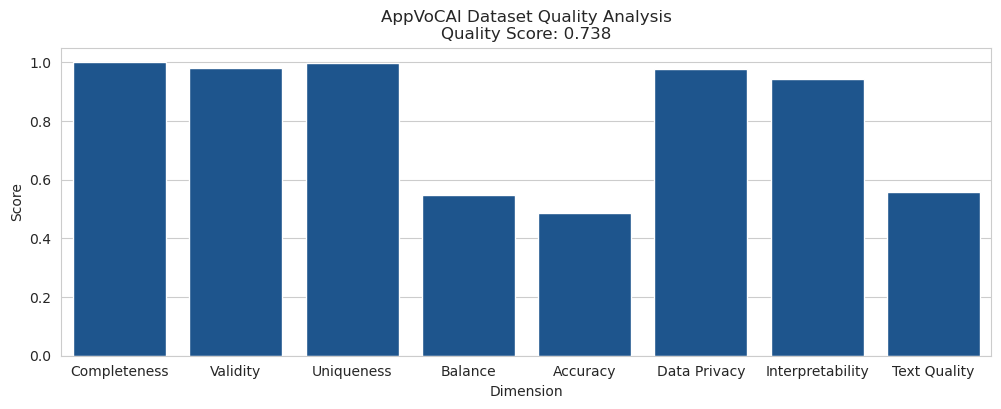

In [5]:
dqa.plot_quality()

This section highlights key areas where our data quality demands further scrutiny, emphasizing **Balance**, **Accuracy**, and **Text Quality** as focal points for improvement.

### 1. **Balance** (Score: Moderate)
- **Current Status**: The Balance score is markedly lower compared to dimensions like Completeness, Validity, and Uniqueness.
- **Implications**: Imbalances within the dataset, such as uneven distributions of sentiment classes or user feedback, may bias analyses and affect the generalizability of models. These imbalances complicate efforts to build models that perform consistently across all data segments.
- **Next Steps**: Examine the sentiment distribution patterns to better understand where imbalances lie. Insights gleaned from this analysis will guide potential downstream data augmentation techniques, ensuring a more representative dataset for modeling.

### 2. **Text Quality** (Score: Needs Significant Attention)
- **Current Status**: Scoring the lowest among all dimensions, Text Quality highlights serious concerns regarding the richness and diversity of our data. Deficiencies may include limited lexical variation, insufficient syntactic sophistication, or a lack of textual coherence.
- **Implications**: Poor text quality poses challenges for natural language processing tasks that require depth and nuance, potentially degrading model performance and insight generation. 
- **Next Steps**: Evaluate the distribution of text quality scores vis-a-vis quality score thresholds to identify the highest-quality reviews for modeling self-training and fine-tuning. 
### 3. **Accuracy** (Score: Needs Improvement)
- **Current Status**: The Accuracy score points to issues like noisy, inconsistent data. Examples could involve spelling errors, irregular sentence structures, or extraneous characters that interfere with data reliability.
- **Implications**: Inconsistent or error-prone data compromises the effectiveness of NLP models, leading to potential misinterpretations or unreliable outcomes.
- **Next Steps**:  Inspect the data, focusing on artifacts, extraneous characters, patterns and noise requiring treatment during the data cleaning stage.

Completeness, Validity, and Uniqueness exhibit strong performance, yet the focus shifts to Balance, Text Quality, and Accuracy. Let's take a closer look. 

## Quality Dimension Analysis
Let's take a closer look at key quality ddimensions which will be addressed during the data cleaning process. 

### Balance

,count,mean,std,min,25%,50%,75%,max
quant_sentiment_score,86705.0,0.333954,0.527003,-1.0,0.0,0.4738,0.7942,1.0


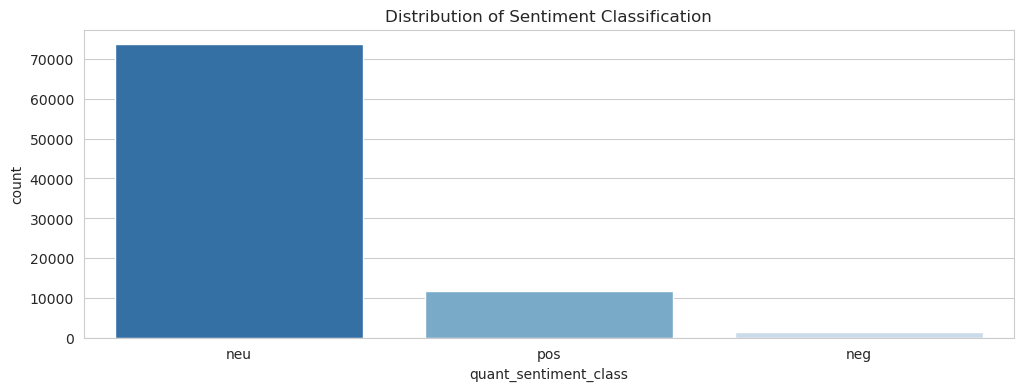

In [6]:
dqa.plot_balance()

The **"Distribution of Sentiment Classification"** illustrates a marked imbalance in sentiment classes, with a strong skew toward **neutral** sentiment.

#### Key Insights
1. **Dominance of Neutral Sentiment**:
   - The majority of reviews fall into the **neutral** category, overshadowing the presence of both positive and negative sentiment classes. This indicates that a substantial portion of the dataset consists of reviews with minimal or mixed emotional content, potentially limiting the dataset's expressiveness in terms of sentiment polarity.

2. **Underrepresentation of Positive and Negative Sentiment**:
   - Reviews classified as **positive** and especially **negative** are significantly underrepresented. This stark imbalance highlights a potential challenge in capturing the full range of sentiment expressed in the dataset, which may affect the efficacy of sentiment-related analysis and modeling.

#### Implications
The evident skew toward neutral sentiment, combined with the scarcity of positive and negative reviews, suggests that data augmentation and sampling strategies will be required to achieve a more balanced and comprehensive representation of sentiment in the data.

### Text Quality

,count,mean,std,min,25%,50%,75%,max
tqa_score,86705.0,0.557836,0.212837,0.0,0.450953,0.631011,0.700271,1.0


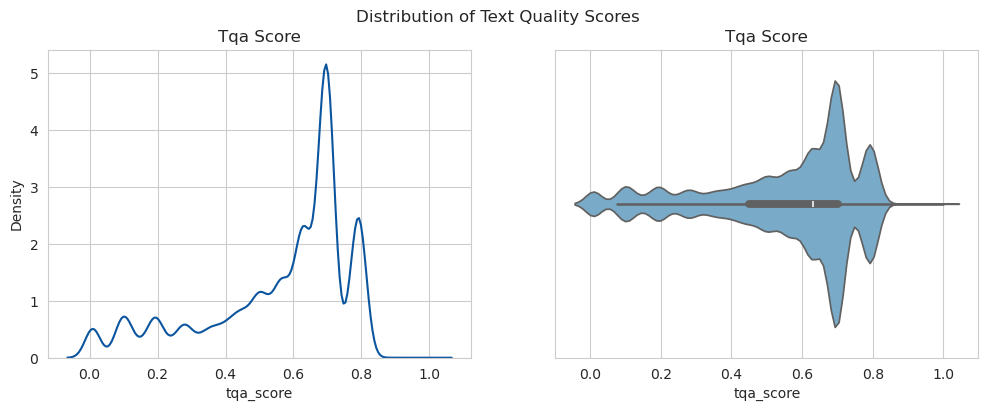

In [7]:
dqa.plot_text_quality()

The distribution of **Text Quality Assessment (TQA) scores**, as visualized through the density and violin plots, reveals important characteristics that can guide threshold setting for sampling.


1. **Bimodal Distribution**:
   - The density plot displays a **bimodal shape**, with two distinct peaks. One prominent cluster occurs in the mid-range of scores, while a second, sharper peak appears closer to the higher end. This suggests the presence of two main groups of text quality within the dataset: a substantial portion of moderately well-structured reviews and another segment of high-quality text.
   - **Implications for Sampling**: The bimodal nature of the distribution indicates a potential threshold strategy. One could consider sampling from the higher peak to ensure that only the top-quality reviews are selected, maximizing the benefit for model training.

2. **Long Tail on the Lower End**:
   - The distribution stretches out toward the lower end, with a longer tail indicating a smaller but notable number of low-quality reviews. These lower scores represent text that may lack coherence, contain errors, or exhibit reduced linguistic complexity.
   - **Filtering Considerations**: This long tail suggests that a lower threshold could be set to filter out these less useful samples, reducing noise in the training data.

3. **Concentration of High-Quality Reviews**:
   - The violin plot shows a clear concentration of reviews around the higher peak, reinforcing the idea that there is a significant portion of high-quality text. This visually emphasizes that a focused sampling strategy can target these reviews to enhance self-training and fine-tuning efforts.
   - **Threshold Selection**: A logical approach would be to set a threshold just below this upper cluster to capture the highest quality reviews. This ensures the selected data is linguistically rich and structurally sound, providing an ideal foundation for model learning.

The bimodal distribution and concentration of higher-quality scores offer a clear rationale for setting sampling thresholds. By focusing on the reviews within the upper peak and filtering out the lower-quality long tail, the dataset can be optimized for training purposes, balancing quality and diversity effectively.

### Accuracy

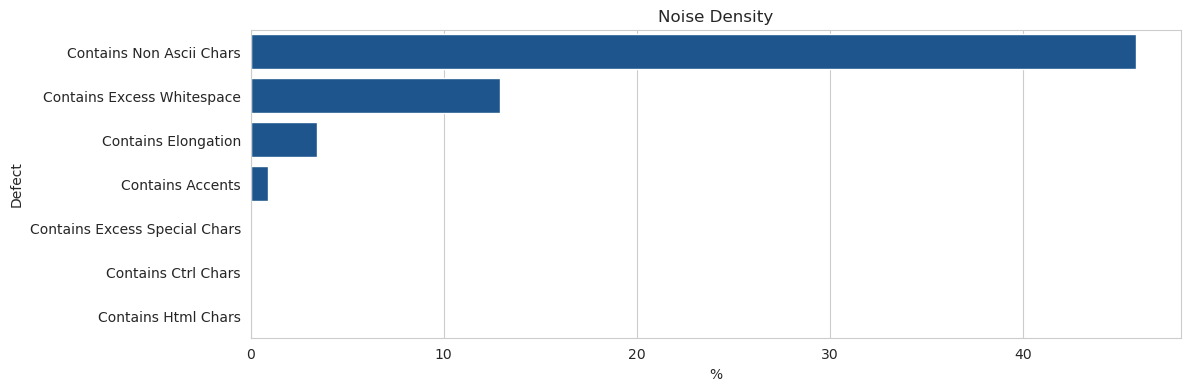

In [8]:
dqa.plot_noise()

The **Noise Density** chart provides an overview of various text defects in the dataset, expressed as a percentage. The most prevalent issues include **non-ASCII characters** and **excess whitespace**, followed by a smaller percentage of text elongation, accents, special characters, control characters, and HTML characters. 

#### Key Observations
1. **Prevalence of Non-ASCII Characters**:
   - **Highest Density**: Non-ASCII characters make up the largest category, affecting nearly **40%** of the data. This is a critical finding, as non-ASCII characters encompass a wide range of meaningful text elements, such as emojis, symbols, and characters from non-Latin scripts.
   - **Nuanced Approach Needed**: Unlike typical noise, non-ASCII characters can convey essential meaning. For instance, **emojis** often carry strong emotional context that can be valuable for sentiment analysis, while non-Latin script characters are vital for multilingual text processing. Simply filtering or removing these characters could strip the data of valuable linguistic and cultural cues, especially for transformer models that are equipped to handle diverse character sets.

2. **Excess Whitespace**:
   - **Significant Presence**: Excess whitespace accounts for a substantial portion of the noise, impacting over **20%** of the data. This issue generally arises from formatting inconsistencies and can be easily addressed through text preprocessing. Removing excess whitespace can improve text consistency without affecting the semantic content.

3. **Other Noise Types**:
   - **Text Elongation and Accents**: While less common, text elongation (e.g., repeated letters for emphasis) and accented characters still affect a notable subset of the data. Both can carry meaning, such as emphasis or regional language variations, and should be handled thoughtfully.
   - **Special, Control, and HTML Characters**: These defects are relatively infrequent but still require attention. Control characters and HTML tags, in particular, can disrupt text parsing and should be removed or replaced with cleaner representations.


#### Implications for Data Processing
A **one-size-fits-all** approach to noise reduction would be inappropriate given the complexity and potential value of certain noise types:
- **Non-ASCII Characters**: Instead of outright removal, a nuanced strategy is required. We must assess whether these characters provide meaningful input for models, especially in tasks like sentiment analysis, where elements like emojis can enhance the model's understanding of emotional tone.
- **Whitespace and Control Characters**: These can be safely normalized or removed, as they generally do not add semantic value.
- **Elongation and Accents**: Context-sensitive handling may be necessary. For example, elongation can indicate emphasis in informal writing, while accents may be crucial for accurate representation in multilingual datasets.

The diversity of noise types in the dataset highlights the need for a thoughtful, tailored approach to text preprocessing. While standard cleaning practices can be applied to whitespace and control characters, handling non-ASCII and accent-related noise requires careful consideration to preserve meaningful content. This nuanced approach ensures that critical information is retained, especially when leveraging transformer models that can effectively process and interpret diverse linguistic features.

### Summary of Data Quality Analysis
The Data Quality Assessment identified key problem areas, including **Balance**, **Accuracy**, and **Text Quality**. Each of these dimensions presents unique challenges with implications for subsequent analysis and modeling. Imbalances in the data may lead to biased outcomes, inaccuracies could disrupt model performance, and lower text quality threatens the linguistic richness needed for robust NLP tasks.

In the next section, we transition to the **Data Cleaning** phase, where we will apply targeted strategies to mitigate these issues, ensuring that the dataset is well-prepared for reliable and effective modeling.
